<a href="https://colab.research.google.com/github/GraceWangui/Spam-Text-Classification/blob/main/SpamText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spam detection is one of the major applications of Machine Learning in the interwebs today. Pretty much all of the major email service providers have spam detection systems built in and automatically classify such mail as 'Junk Mail'.

In this project, I have explored and compared text preprocessing and feature selection methods among word count, character count and bag of words. Logistic regression classifier is used to detect ham or spam SMS messages.

 **Import modules and DataSets**

In [ ]:
import pandas as pd
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

sms = pd.read_table('SMSSpamCollection',sep='\t',names=['label','texts'])

# Output printing out first 5 columns
sms.head()

,label,texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Exploratory data analysis.**

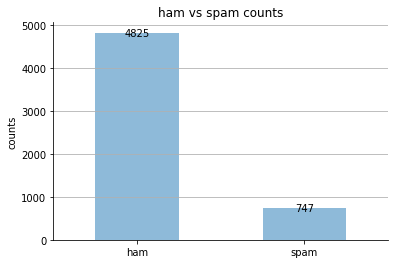

In [ ]:
#visualize ham vs spam counts
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
sms['label'].value_counts().plot(kind='bar', alpha=0.5, grid=True)
plt.ylabel('counts')
plt.title('ham vs spam counts')
plt.xticks(rotation='horizontal')
ax.xaxis.grid(which="major")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center')

Distribution by label: Ham count is more than six times as many as spam.


Lowering cases and striping punctuations will make text an easier string format. The next step is counting number of words ("word_count") and number of characters ("char_count") appeared in each SMS message.


In [ ]:
#lowering case characters and stripping punctuation of texts
from string import punctuation
def preprocess1 (str):
    """ str --> str
    lower case and strip punctuations of a string
    """
    for p in list(punctuation):
        str = str.lower().replace(p, '')
    return str
sms['texts'] = sms.texts.apply(preprocess1)

#creating word count feature as "word_count"
def word_count (str):
    """str --> int
    return the number of words appeared in a string
    """
    return len(str.split())
sms['word_count'] = sms.texts.apply(word_count)

#creating character count feature as "char_count"
def char_count (str):
    """ str --> int
    return the number of character count of a string
    """
    return len(list(str))
sms['char_count'] = sms.texts.apply(char_count)

#vew new data set
print(sms.shape)
sms.head()

(5572, 4)


,label,texts,word_count,char_count
0,ham,go until jurong point crazy available only in ...,20,102
1,ham,ok lar joking wif u oni,6,23
2,spam,free entry in 2 a wkly comp to win fa cup fina...,28,149
3,ham,u dun say so early hor u c already then say,11,43
4,ham,nah i dont think he goes to usf he lives aroun...,13,59


visualize distribution pattern of word count by plotting a normalized histogram

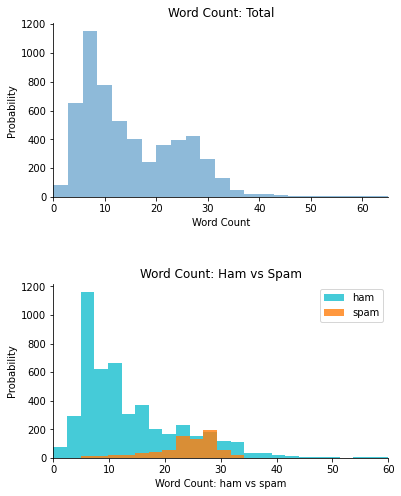

In [ ]:
#visualize word_count
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.hist(sms['word_count'], bins=60, color='#1f77b4', alpha=0.5)
plt.xlim(0,65)
plt.xlabel('Word Count')
plt.ylabel('Probability')
plt.title('Word Count: Total')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = fig.add_subplot(2, 1, 2)
bins = np.histogram(np.hstack((sms.loc[sms.label=='ham']['word_count'], sms.loc[sms.label=='spam']['word_count'])), bins=70)[1]
plt.hist(sms.loc[sms.label=='ham']['word_count'], bins, color='#17becf', alpha=0.8, label='ham')
plt.hist(sms.loc[sms.label=='spam']['word_count'], bins, color='#ff7f0e', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 60)
plt.xlabel('Word Count: ham vs spam')
plt.ylabel('Probability')
plt.title('Word Count: Ham vs Spam')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.subplots_adjust(hspace=0.5)

 Spam messages are in general consists of more words! That also makes sense from real life experience.

Statistical Inferance for Word Count.

In [ ]:
#Calculate mean for word count for spam and ham messages.
ham_word_count = sms.loc[sms.label=='ham']['word_count']
spam_word_count = sms.loc[sms.label=='spam']['word_count']
print ('mean-ham:', ham_word_count.mean())
print ('mean-spam:', spam_word_count.mean())

mean-ham: 14.098860103626944
mean-spam: 23.613119143239626


In [ ]:
#Calculate standard deviation for word count for spam and ham messages.
print('stand-deviation-ham:', ham_word_count.std())
print('stand-deviation-spam:', spam_word_count.std())

stand-deviation-ham: 11.237982744383194
stand-deviation-spam: 5.692428468279855


In [ ]:
#There's a Shapiro-Wilk test to test for normality. If p-value is less than 0.05, then there's a low chance that the distribution is normal.
from scipy import stats
print ("Shapiro-Wilk test results for ham sample:", stats.shapiro(ham_word_count))
print ("Shapiro-Wilk test results for spam sample", stats.shapiro(spam_word_count))

Shapiro-Wilk test results for ham sample: (0.76556795835495, 0.0)
Shapiro-Wilk test results for spam sample (0.9076801538467407, 7.416203296324243e-21)


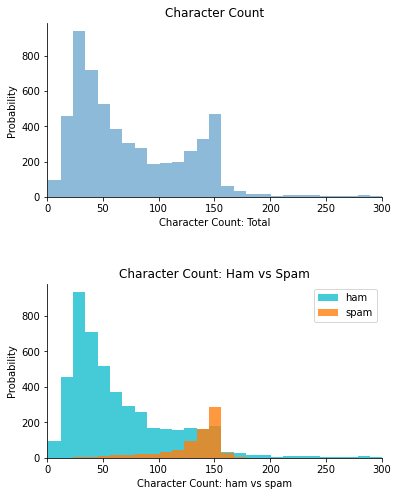

In [ ]:
#More than one third of spam messages fall between 140-160 characters, 
#and it's probably due to the fact that SMS message will be broken down into chuncks if it's more than 160 characters.
#tis is shown below.
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.hist(sms['char_count'], bins=80,color='#1f77b4', alpha=0.5)
plt.xlim(0,300)
plt.xlabel('Character Count: Total')
plt.ylabel('Probability')
plt.title('Character Count')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = fig.add_subplot(2, 1, 2)
bins = np.histogram(np.hstack((sms.loc[sms.label=='ham']['char_count'], sms.loc[sms.label=='spam']['char_count'])), bins=80)[1]
plt.hist(sms.loc[sms.label=='ham']['char_count'], bins, color='#17becf', alpha=0.8, label='ham')
plt.hist(sms.loc[sms.label=='spam']['char_count'], bins, color='#ff7f0e', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 300)
plt.xlabel('Character Count: ham vs spam')
plt.ylabel('Probability')
plt.title('Character Count: Ham vs Spam')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.subplots_adjust(hspace=0.5)
#visualize char_count

## **Bag of Words**


A simple way to respensent texts is bag-or-words. The basic idea is to count how often each word appears in each text in the corpus

In [ ]:

# dummy code variable
sms = pd.get_dummies(sms, columns=['label'])
#identify explaining variables and target variable
y = sms[['label_spam']]
X = sms[['word_count']]
#split data into training and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

number of features:8458


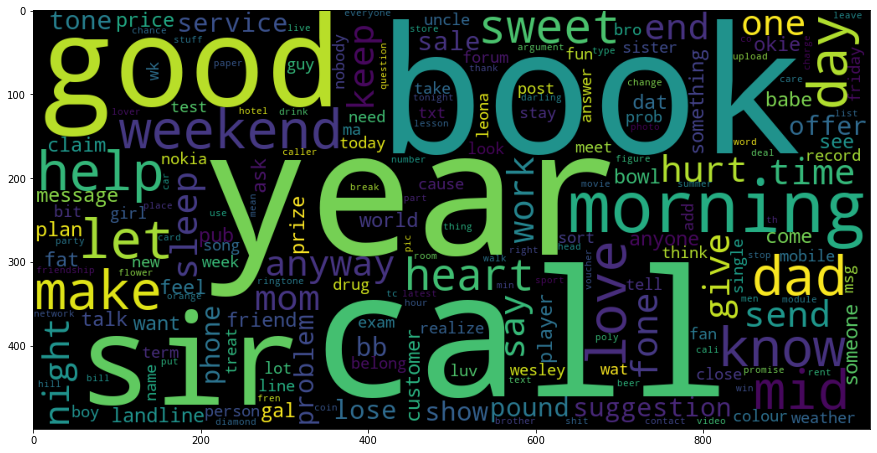

Best cross validation score: 0.98
Best parameters: {'C': 10}
Test score:0.98


In [ ]:
#identify explaining variables and target variable
X_b = sms['texts']
y_b = sms['label_ham']

#split data into training and test data sets
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.2)

#tokenization and vocabulary building over all documents
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_b_train)

print ('number of features:{}'.format(len(vect.vocabulary_)))

#visualize with wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(vect.vocabulary_))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.show()

#tokenization and vocabulary building over all training data set
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_b_train)

#sparse matrix encoding, resulting in one vector of word counts for each document.
X_b_train = vect.transform(X_b_train)

#import LogisticRegression classifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#grid search for best parameter
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_b_train, y_b_train)
print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
print ('Best parameters:', grid.best_params_)

#fit classifier in test dataset
X_b_test = vect.transform(X_b_test)
print('Test score:{:.2f}'.format(grid.score(X_b_test, y_b_test)))

We can further improve the model by setting the value of min_df in CountVectorizer. This means we only select tokens that appear in at list min_df of documents. In this dase, I set min_df=5. The accuracy score is still 0.98, however the number of features deducted from 8368 to 1481, which improves the computation efficiency.

number of features:1481


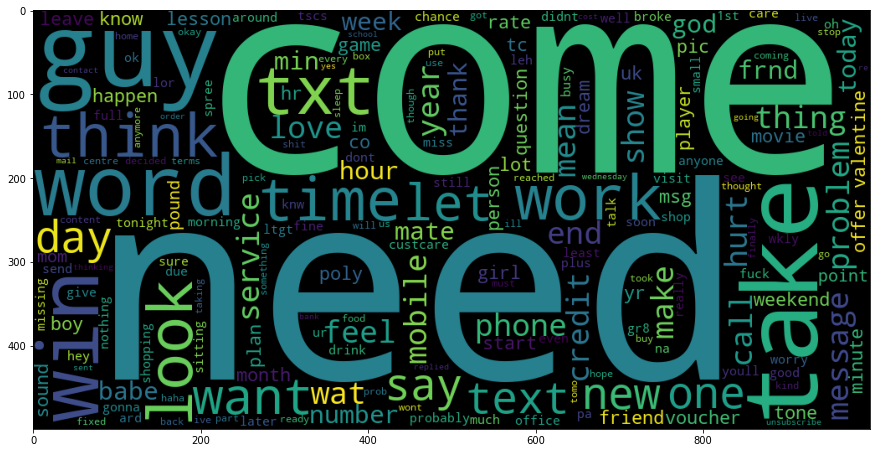

Best cross validation score: 0.98
Parameters: {'C': 10}
Test score:0.98


In [ ]:
#improve the model by selecting tokens that appear in at least 5 documents
X_b = sms['texts']
y_b = sms['label_ham']
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.2)
vect = CountVectorizer(min_df=5).fit(X_b_train)
X_b_train = vect.transform(X_b_train)

print ('number of features:{}'.format(len(vect.vocabulary_)))

#visualize features
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(vect.vocabulary_))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.show()

#fit in logistic regression
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_b_train, y_b_train)
print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
print ('Parameters:', grid.best_params_)
X_b_test = vect.transform(X_b_test)
print('Test score:{:.2f}'.format(grid.score(X_b_test, y_b_test)))


In [ ]:
#apply LogisticRegression classfier
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
print (lg.coef_)
print('training set score obtained Logistic Regression: {:.2f}'.format(lg.score(X_train, y_train)))
print('test set score obtained Logistic Regression: {:.2f}'.format(lg.score(X_test, y_test)))


[[0.13249041]]
training set score obtained Logistic Regression: 0.76
test set score obtained Logistic Regression: 0.75


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = lg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[713 253]
 [ 26 123]]


In [ ]:
#The confusion matrix shows that 223(25%) of non-spam data is predicted as spam

In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84       966
           1       0.33      0.83      0.47       149

    accuracy                           0.75      1115
   macro avg       0.65      0.78      0.65      1115
weighted avg       0.88      0.75      0.79      1115



Character Count

In [ ]:
# #dummy code "label"
# sms = pd.get_dummies(sms, columns=['label'])

#identify explaining variables and target variable
X_c = sms[['char_count']]
y_c = sms[['label_spam']]
#split data into training and test data sets
from sklearn.model_selection import train_test_split
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.2)

#apply LogisticRegression classfier
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(class_weight='balanced').fit(X_c_train, y_c_train)
print('training set score obtained Logistic Regression: {:.2f}'.format(lg.score(X_c_train, y_c_train)))
print('test set score obtained Logistic Regression: {:.2f}'.format(lg.score(X_c_test, y_c_test)))

training set score obtained Logistic Regression: 0.81
test set score obtained Logistic Regression: 0.79


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print ("Confusionn Matrix:")
y_c_pred = lg.predict(X_c_test)
y_c_pred_arr = y_c_pred.tolist()
y_c_test_arr = np.array(y_c_test.label_spam).tolist()
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_c_test, y_c_pred)
# matrix = confusion_matrix(y_c_test_arr, y_c_pred_arr)
print(confusion_matrix)
print ("Classification Report: ")
print(classification_report(y_c_test, y_c_pred))

Confusionn Matrix:
[[759 203]
 [ 27 126]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       962
           1       0.38      0.82      0.52       153

    accuracy                           0.79      1115
   macro avg       0.67      0.81      0.70      1115
weighted avg       0.89      0.79      0.82      1115

